In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests


In [2]:
#!pip install wordcloud

In [2]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

In [4]:
#!pip install spacy

In [3]:
#import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score

ModuleNotFoundError: No module named 'textblob'

In [5]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wakhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wakhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df=pd.read_csv("data/BA_reviews.csv",usecols=["reviews"])

In [8]:
df.head()

,reviews
0,✅ Trip Verified | Very competent check in sta...
1,"✅ Trip Verified | Check in was so slow, no se..."
2,✅ Trip Verified | My review relates to the ap...
3,✅ Trip Verified | This was my first time flyin...
4,✅ Trip Verified | Lots of cancellations and d...


In [9]:
df["clean_reviews"]=df["reviews"].str.split("|",expand=True)[1]

In [10]:
df.head()

,reviews,clean_reviews
0,✅ Trip Verified | Very competent check in sta...,"Very competent check in staff, saw had a pro..."
1,"✅ Trip Verified | Check in was so slow, no se...","Check in was so slow, no self check in and b..."
2,✅ Trip Verified | My review relates to the ap...,My review relates to the appalling experienc...
3,✅ Trip Verified | This was my first time flyin...,This was my first time flying with BA & I was...
4,✅ Trip Verified | Lots of cancellations and d...,Lots of cancellations and delays and no one ...


In [11]:
df.isnull().sum()

reviews             0
clean_reviews    1523
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

reviews          0
clean_reviews    0
dtype: int64

In [14]:
df.shape

(1953, 2)

In [25]:
import re
import string

In [26]:
def clean_text(text):
    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = ''.join([i for i in text if not i.isdigit()]) 
    text=re.sub('british arway*','',text)
    return text
cleaning = lambda x: clean_text(x)


In [27]:
df["clean_reviews"]=df["clean_reviews"].apply(cleaning)

In [28]:
df.head()

,reviews,clean_reviews
0,✅ Trip Verified | Very competent check in sta...,very competent check in staff saw had a prob...
1,"✅ Trip Verified | Check in was so slow, no se...",check in was so slow no self check in and ba...
2,✅ Trip Verified | My review relates to the ap...,my review relates to the appalling experienc...
3,✅ Trip Verified | This was my first time flyin...,this was my first time flying with ba i was ...
4,✅ Trip Verified | Lots of cancellations and d...,lots of cancellations and delays and no one ...


In [29]:
df.duplicated().sum()

0

In [30]:
# def remove_special_characters(text):
#     text = re.sub('[^0-9]', '', text)
#     return text

In [31]:
# df["clean_reviews"]=df["clean_reviews"].apply(remove_special_characters)

In [34]:
TextBlob(df['clean_reviews'][4]).ngrams(2)[:10]


[WordList(['lots', 'of']),
 WordList(['of', 'cancellations']),
 WordList(['cancellations', 'and']),
 WordList(['and', 'delays']),
 WordList(['delays', 'and']),
 WordList(['and', 'no']),
 WordList(['no', 'one']),
 WordList(['one', 'apologized']),
 WordList(['apologized', 'edinburgh']),
 WordList(['edinburgh', 'to'])]

In [35]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english')[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [36]:
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [37]:
from nltk.tokenize import word_tokenize  
#Tokenization of text
tokenizers=ToktokTokenizer()
#Setting English stopwords
stopwords=nltk.corpus.stopwords.words('english')

In [38]:
def custom_remove_stopwords(text, is_lower_case=False):
    tokens = tokenizers.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [39]:
df["clean_reviews"]=df["clean_reviews"].apply(custom_remove_stopwords)

In [40]:
df.head()

,reviews,clean_reviews
0,✅ Trip Verified | Very competent check in sta...,competent check staff saw problem left arm ins...
1,"✅ Trip Verified | Check in was so slow, no se...",check slow no self check bag drop boarding ok ...
2,✅ Trip Verified | My review relates to the ap...,review relates appalling experiences british a...
3,✅ Trip Verified | This was my first time flyin...,first time flying ba pleasantly surprised isla...
4,✅ Trip Verified | Lots of cancellations and d...,lots cancellations delays no one apologized ed...


In [41]:
TextBlob(df['clean_reviews'][4]).ngrams(2)[:5]


[WordList(['lots', 'cancellations']),
 WordList(['cancellations', 'delays']),
 WordList(['delays', 'no']),
 WordList(['no', 'one']),
 WordList(['one', 'apologized'])]

In [42]:
freq = pd.Series(' '.join(df['clean_reviews']).split()).value_counts()[:10]


In [43]:
freq

flight     3692
ba         2597
not        2444
no         1714
service    1572
london     1516
seat       1211
food       1210
british    1108
airways    1107
dtype: int64

<AxesSubplot:>

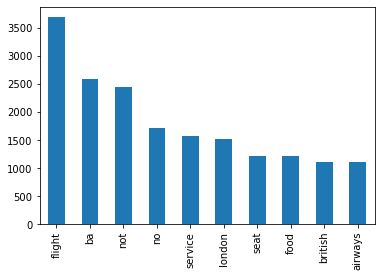

In [44]:
freq.plot(kind="bar")

In [45]:
def get_top_n2_words(corpus, n=None):
    
    vec1 = CountVectorizer(ngram_range=(2,2), #for tri-gram, put ngram_range=(3,3)
        max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in 
      vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
     reverse=True)
    return words_freq[:n]

In [46]:
top2_words=get_top_n2_words(df["clean_reviews"],n=200)
top2_df=pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram","Freq"]
top2_df.head()

,Bi-gram,Freq
0,british airways,1067
1,business class,617
2,london heathrow,479
3,cabin crew,453
4,customer service,261


In [71]:
%matplotlib inline

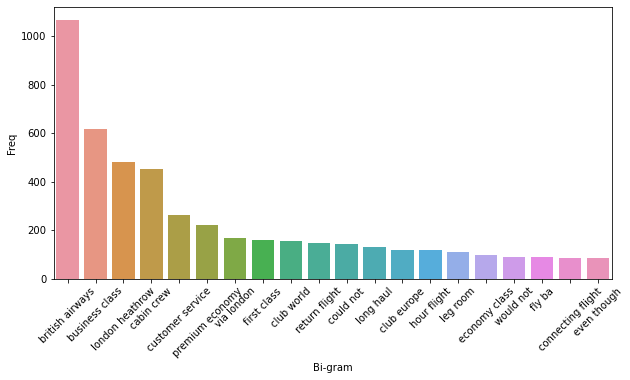

In [72]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.savefig('my_plot.png')


In [73]:
def get_top_n3_words(corpus, n=None):
    
    vec1 = CountVectorizer(ngram_range=(3,3), 
          max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in 
          vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
        reverse=True)
    return words_freq[:n]


In [74]:
top3_words = get_top_n3_words(df["clean_reviews"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df


,Tri-gram,Freq
0,busi class seat,61
1,fli british airway,56
2,flew british airway,53
3,long haul flight,46
4,british airway flight,43
...,...,...
195,upgrad premium economi,7
196,busi class servic,7
197,flight entertain system,7
198,san francisco london,7


[Text(0, 0, 'busi class seat'),
 Text(1, 0, 'fli british airway'),
 Text(2, 0, 'flew british airway'),
 Text(3, 0, 'long haul flight'),
 Text(4, 0, 'british airway flight'),
 Text(5, 0, 'heathrow british airway'),
 Text(6, 0, 'via london heathrow'),
 Text(7, 0, 'flight british airway'),
 Text(8, 0, 'world travel plu'),
 Text(9, 0, 'busi class passeng'),
 Text(10, 0, 'low cost airlin'),
 Text(11, 0, 'british airway not'),
 Text(12, 0, 'london heathrow british'),
 Text(13, 0, 'short haul flight'),
 Text(14, 0, 'london british airway'),
 Text(15, 0, 'ba custom servic'),
 Text(16, 0, 'low cost carrier'),
 Text(17, 0, 'flew london heathrow'),
 Text(18, 0, 'miss connect flight'),
 Text(19, 0, 'new york jfk')]

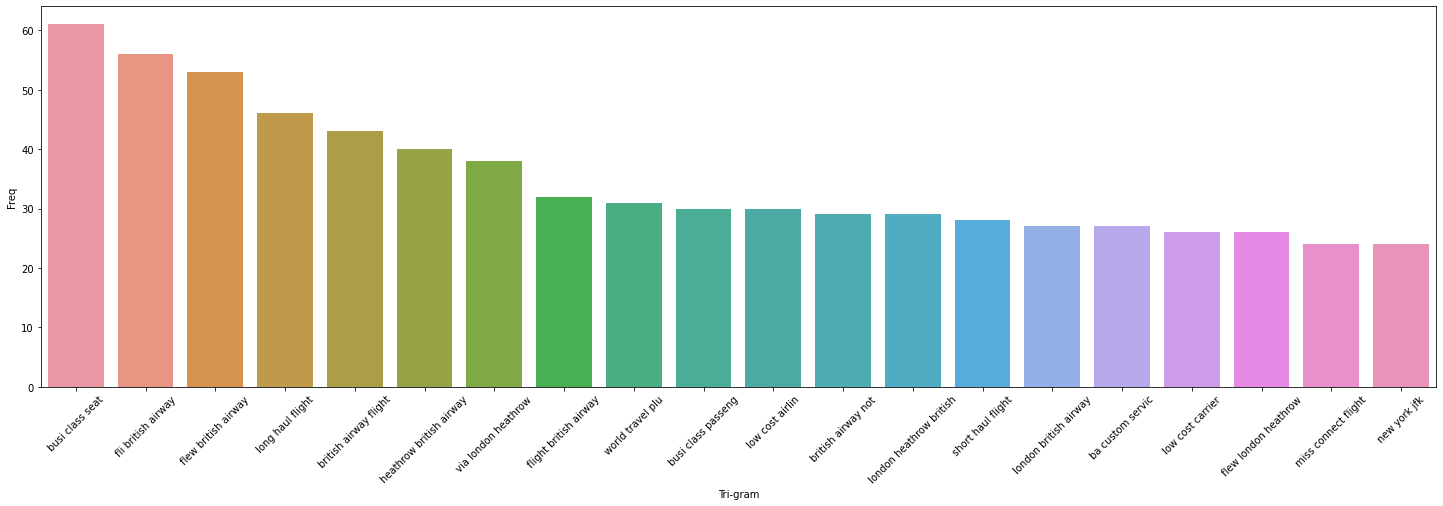

In [75]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])


In [76]:
string_total = " ".join(top2_df["Bi-gram"])
string_total[:2000]

def remove_less_useful_words(string_total):
    string_total=string_total.replace("flight","")
    string_total=string_total.replace("ba","")
    string_total=string_total.replace("british","")
    string_total=string_total.replace("airline","")
    
    return string_total
string_total=remove_less_useful_words(string_total)
    





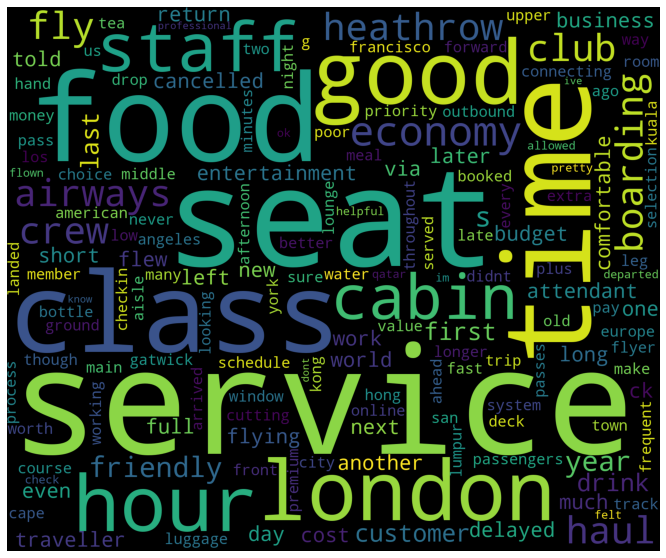

In [82]:
from wordcloud import WordCloud
wordcloud_generator = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_total)
fig = plt.figure(figsize = (15,10))
plt.imshow(wordcloud_generator)
plt.axis('off')
plt.show()

In [83]:
def stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
df["clean_reviews"]=df["clean_reviews"].apply(stemmer)

In [84]:
vectorizer=TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5)

doc_vec=vectorizer.fit_transform(df["clean_reviews"])
names_features=vectorizer.get_feature_names_out()
dense=doc_vec.todense()
denselist=dense.tolist()

df1=pd.DataFrame(denselist,columns=names_features)
df1.head()

,aa,abl,absolut,accept,access,accommod,actual,ad,add,addit,...,worst,worth,wouldnt,write,wrong,ye,year,york,young,zero
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.094849,0.0,0.0,0.0
2,0.0,0.0,0.0,0.124868,0.0,0.0,0.0,0.0,0.072086,0.063446,...,0.0,0.0,0.0,0.0,0.067172,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [85]:
def fetch_sentiment_using_textblob(text):
    
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'

In [81]:
fetch_sentiment_using_textblob = df.clean_reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(fetch_sentiment_using_textblob.value_counts())


,clean_reviews
positive,1388
negative,565


In [86]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wakhu\AppData\Roaming\nltk_data...


True

In [87]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(df.clean_reviews[4])


{'neg': 0.357, 'neu': 0.585, 'pos': 0.058, 'compound': -0.8271}

In [95]:
df_score=pd.DataFrame()
df_score['clean_reviews'] = df.clean_reviews
df_score['scores'] = df['clean_reviews'].apply(lambda review: sid.polarity_scores(review))
df_score['compound'] = df_score['scores'].apply(lambda scores: scores['compound'])
df_score['sentiment'] = df_score['compound'].apply(lambda c: 'Positive' if c >=0.5 else ('negative'))

In [96]:
df_score

,clean_reviews,scores,compound,sentiment
0,compet check staff saw problem left arm insist...,"{'neg': 0.068, 'neu': 0.855, 'pos': 0.077, 'co...",0.1571,negative
1,check slow no self check bag drop board ok fli...,"{'neg': 0.076, 'neu': 0.688, 'pos': 0.236, 'co...",0.9042,Positive
2,review relat appal experi british airway th fe...,"{'neg': 0.113, 'neu': 0.809, 'pos': 0.078, 'co...",-0.8779,negative
3,first time fli ba pleasantli surpri islamabad ...,"{'neg': 0.063, 'neu': 0.682, 'pos': 0.255, 'co...",0.9125,Positive
4,lot cancel delay no one apolog edinburgh londo...,"{'neg': 0.357, 'neu': 0.585, 'pos': 0.058, 'co...",-0.8271,negative
...,...,...,...,...
2121,london heathrow houston british airway friendl...,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.7430,Positive
2122,flown british airway time usual busi class cur...,"{'neg': 0.152, 'neu': 0.757, 'pos': 0.09, 'com...",-0.6405,negative
2123,british airway seattl johannesburg via london ...,"{'neg': 0.105, 'neu': 0.791, 'pos': 0.104, 'co...",0.1645,negative
2125,gatwick amsterdam busi class truli uncomfort f...,"{'neg': 0.079, 'neu': 0.81, 'pos': 0.111, 'com...",0.1027,negative


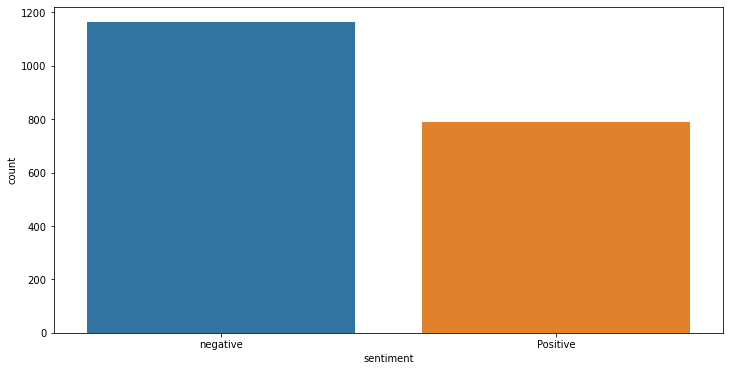

In [97]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df_score)

plt.title("")
plt.show()


In [100]:
df_score["sentiment"].value_counts()

negative    1163
Positive     790
Name: sentiment, dtype: int64

In [ ]:
from sklearn.cluster import KMeans

In [84]:
km=KMeans(n_clusters=2,random_state=0)

In [85]:
y_kmeans=km.fit_predict(df1)

C:\Users\wakhu\anaconda3\envs\new_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [88]:
y_kmeans

array([1, 1, 0, ..., 1, 1, 0])

In [91]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_get_backend_mod',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_

In [92]:
plt.bar(y_kmeans)

TypeError: bar() missing 1 required positional argument: 'height'